In [1]:
import sys
sys.path.append('..')
from cmost_exposure import Exposure

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy.ndimage as ndimage

font = {'size' : 14, 'family' : 'sans-serif'}
matplotlib.rc('font', **font)

data_dir = '../data'

In [2]:
# Load exposure from its filepath
ex = Exposure('{}/20210629/cmost014_01.fits'.format(data_dir),cleanup=False)

print(ex.get_info())

 Properties: 
		Readout mode: DEFAULT 
		Date: 2021-06-29T09:00:00.953714 
		Exposure time: 3600000.0 ms
		LED voltage: -1.0 V 
		Temperature: 140.0 K
		Camera ID:  
		Detector ID: 
		Gain mode: 
		Number of frames: 1 frames
		
		


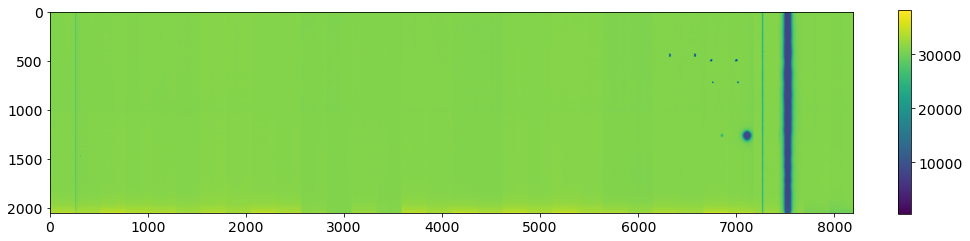

In [3]:
# Plot the raw image
plt.figure(figsize=[16,5])
plt.imshow(ex.raw_frames[0])
plt.colorbar(fraction=0.05, aspect=15, shrink=0.75)
plt.savefig('plots/20210629_raw_image.pdf')
plt.show()
plt.close()

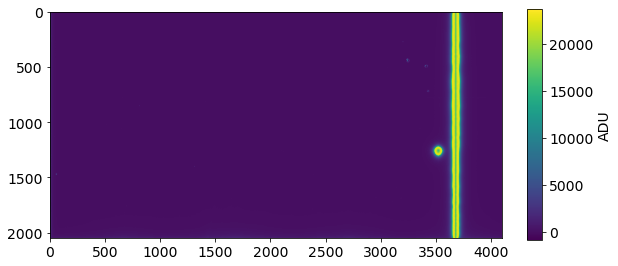

In [4]:
# Plot the CDS image
plt.figure(figsize=[9,5])
plt.imshow(ex.cds_frames[0])
plt.colorbar(fraction=0.05, aspect=15, shrink=0.85, label='ADU')
plt.savefig('plots/20210629_cds_image.pdf')
plt.show()
plt.close()

-0.2016203703703704 5.471990740740741 0.007638888888888889


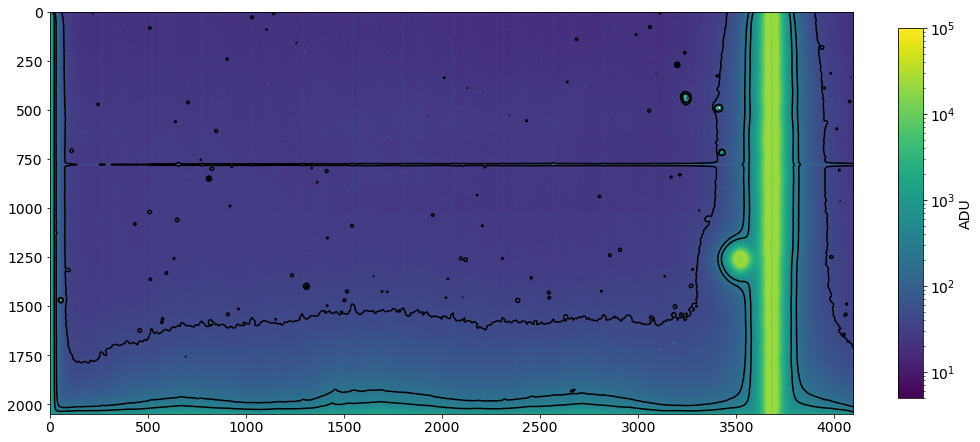

In [5]:
# Convert ADU to e/s
exp = ex.exp_time / 1000 # Convert from ms to s
rate = ex.cds_frames[0] / 1.2 / exp # Assuming high gain mode?

print(np.min(rate),np.max(rate),np.median(rate))

# Smooth it a bit to allow for sensible contours
rate_smooth = ndimage.gaussian_filter(rate, sigma=(5, 5), order=0)

plt.figure(figsize=[16,8])
plt.imshow(ex.cds_frames[0], norm=LogNorm(vmin=5, vmax=1e5))
plt.colorbar(fraction=0.05, aspect=15, shrink=0.85, label='ADU')
plt.contour(rate_smooth,levels=[0.01,0.05,0.1],colors='k')
plt.savefig('plots/20210629_cds_image_log.pdf')
plt.show()
plt.close()

In [6]:
# Load second exposure from its filepath
ex2 = Exposure('{}/20210629/cmost014_02.fits'.format(data_dir),cleanup=False)

print(ex2.get_info())

 Properties: 
		Readout mode: DEFAULT 
		Date: 0001-01-01T00:00:00 
		Exposure time: -1.0 ms
		LED voltage: -1.0 V 
		Temperature: -1.0 K
		Camera ID:  
		Detector ID: 
		Gain mode: 
		Number of frames: 1 frames
		
		


-0.185625 4.92625 0.028541666666666667


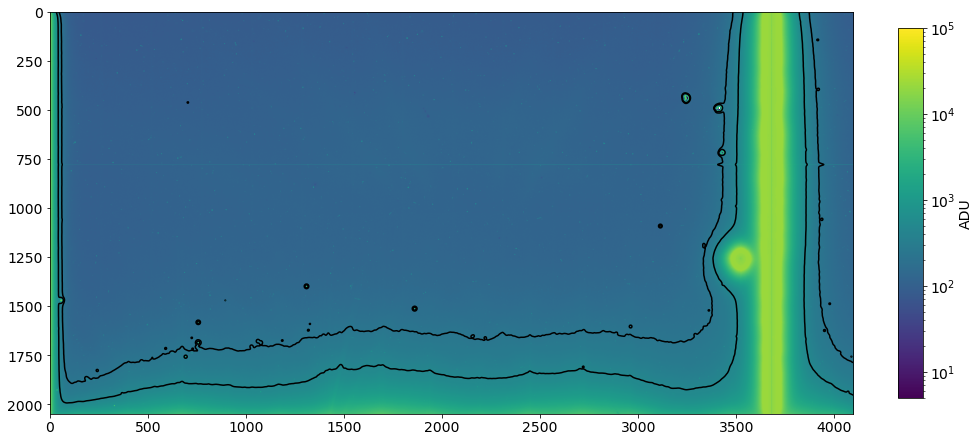

In [7]:
# Convert ADU to e/s
exp2 = 4000 # exposure time not in the fits file
rate2 = ex2.cds_frames[0] / 1.2 / exp2 # Assuming high gain mode?

print(np.min(rate2),np.max(rate2),np.median(rate2))

# Smooth it a bit to allow for sensible contours
rate2_smooth = ndimage.gaussian_filter(rate2, sigma=(5, 5), order=0)

plt.figure(figsize=[16,8])
plt.imshow(ex2.cds_frames[0], norm=LogNorm(vmin=5, vmax=1e5))
plt.colorbar(fraction=0.05, aspect=15, shrink=0.85, label='ADU')
plt.contour(rate2_smooth,levels=[0.01,0.05,0.1],colors='k')
plt.savefig('plots/20210629_cds_image2_log.pdf')
plt.show()
plt.close()

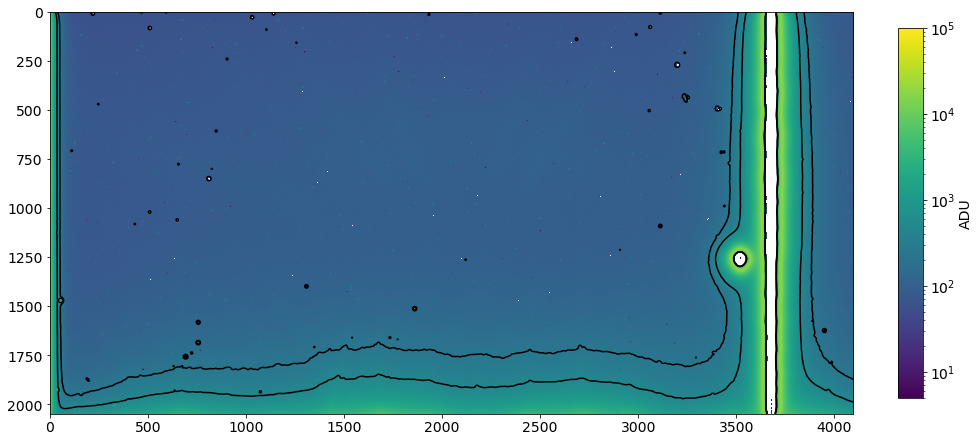

In [8]:
#Plot the 4h minus 1h to remove common bias and plot again. Maybe that won’t be much different.
frame_diff = ex2.cds_frames[0] - ex.cds_frames[0]
rate_diff = rate2_smooth - rate_smooth

plt.figure(figsize=[16,8])
plt.imshow(frame_diff, norm=LogNorm(vmin=5, vmax=1e5))
plt.colorbar(fraction=0.05, aspect=15, shrink=0.85, label='ADU')
plt.contour(rate_diff,levels=[0.01,0.05,0.1],colors='k')
plt.savefig('plots/20210629_cds_image2_log.pdf')
plt.show()
plt.close()